<a href="https://colab.research.google.com/github/nehapatel-ctrl/Neha-Patel/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from google.colab import files
uploaded = files.upload()


Saving Titanic-Dataset.csv to Titanic-Dataset (1).csv


In [17]:
import pandas as pd

df = pd.read_csv("Titanic-Dataset.csv")
print(df.columns.tolist())
df.head()


['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


In [19]:
df = pd.read_csv("Titanic-Dataset.csv")
print("Initial shape:", df.shape)
df.head()


Initial shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
print("\nColumn Names:", df.columns.tolist())
print("\nMissing values:\n", df.isnull().sum())
df.info()
df.describe(include='all')



Column Names: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [21]:
# Fill Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop Cabin (too many nulls)
df.drop(columns=['Cabin'], inplace=True)

# Drop any remaining rows with missing values
df.dropna(inplace=True)

print("\nMissing values after cleaning:\n", df.isnull().sum())



Missing values after cleaning:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [22]:
# One-hot encode 'Sex' and 'Embarked'
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)


In [23]:
df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)


In [24]:
scaler = StandardScaler()
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


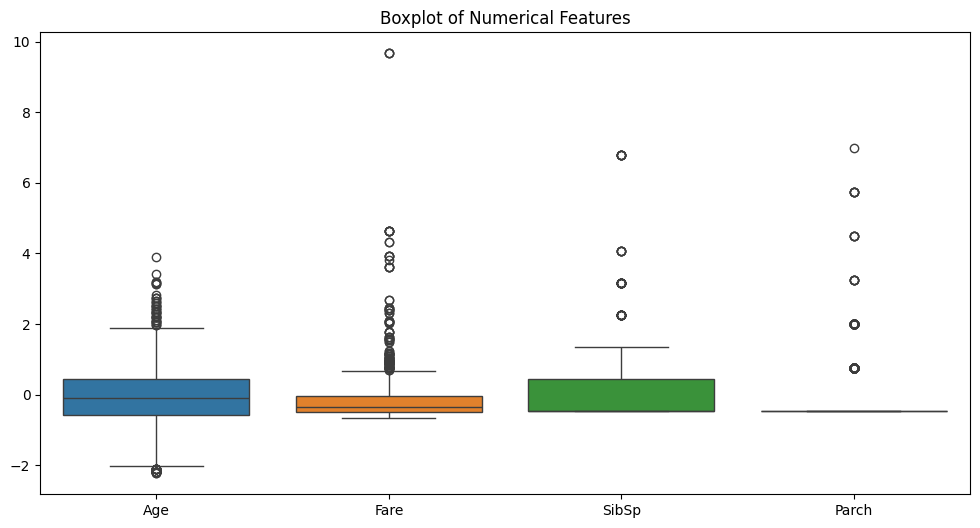

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_cols])
plt.title("Boxplot of Numerical Features")
plt.show()


In [26]:
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

# Apply for each numerical column
for col in numerical_cols:
    df = remove_outliers(df, col)

print("Shape after outlier removal:", df.shape)


Shape after outlier removal: (577, 9)


In [27]:
print("\nFinal dataset shape:", df.shape)
print("\nFinal columns:", df.columns.tolist())
df.head()



Final dataset shape: (577, 9)

Final columns: ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,-0.565736,0.432793,-0.473674,-0.502445,True,False,True
2,1,3,-0.258337,-0.474545,-0.473674,-0.488854,False,False,True
3,1,1,0.433312,0.432793,-0.473674,0.420730,False,False,True
4,0,3,0.433312,-0.474545,-0.473674,-0.486337,True,False,True
5,0,3,-0.104637,-0.474545,-0.473674,-0.478116,True,True,False


In [28]:
df.to_csv("cleaned_titanic.csv", index=False)
print("Saved cleaned dataset as 'cleaned_titanic.csv'")


Saved cleaned dataset as 'cleaned_titanic.csv'
